# DS recruitment project: modelling returned items

In [35]:
import pandas as pd

df = pd.read_parquet("/Users/ibex/becode/BXL-Bouman-7/projects/08-DS-recruitment-challenge/transactions.parquet") 
df.head()

,Shop,Order_Date_FK,ProductCode,OriginalSaleAmountInclVAT,CustomerID,SaleDocumentNumber,Returned,RevenueInclVAT,CostPriceExclVAT,BrandName,ModelGroup,ProductGroup
0,36,20210730,-1968361059464632550,99.95,-2190786785520839526,23995792,0,74.96,36.534515,3694837121284491212,3162564956579801398,-453682476182549203
1,58,20210730,-1745497788861904687,21.95,-3499949798555834600,23995794,0,21.95,7.364523,-1657270726128381662,-6715310361529623819,-453682476182549203
2,49,20210730,-4482110002029860032,69.95,-7841417233849937172,23995797,0,38.47,24.415000,-7202472198306336051,-248459121805647149,5294166889150293396
3,49,20210730,-9146072753857637799,99.95,-7841417233849937172,23995797,0,54.97,32.293506,-2074012670196538378,-248459121805647149,5294166889150293396
4,15,20210730,-8829485741699345914,49.95,7033964597104594686,23995798,0,17.48,8.885632,-4869459690934553786,-4124706989267335995,-453682476182549203


In [36]:
df.columns

Index(['Shop', 'Order_Date_FK', 'ProductCode', 'OriginalSaleAmountInclVAT',
       'CustomerID', 'SaleDocumentNumber', 'Returned', 'RevenueInclVAT',
       'CostPriceExclVAT', 'BrandName', 'ModelGroup', 'ProductGroup'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759889 entries, 0 to 1759888
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Shop                       int64  
 1   Order_Date_FK              int64  
 2   ProductCode                int64  
 3   OriginalSaleAmountInclVAT  float64
 4   CustomerID                 int64  
 5   SaleDocumentNumber         int64  
 6   Returned                   int64  
 7   RevenueInclVAT             float64
 8   CostPriceExclVAT           float64
 9   BrandName                  int64  
 10  ModelGroup                 int64  
 11  ProductGroup               int64  
dtypes: float64(3), int64(9)
memory usage: 161.1 MB


## Data processing

Adjust random numbers for A, B, C... or other type of groups.

In [38]:
print("Product group count:", df.ProductGroup.nunique())
print("Model group count:", df.ModelGroup.nunique())
print("Brand name count:", df.BrandName.nunique())
print("Products count:", df.ProductCode.nunique())
print("Customer ID count", df.CustomerID.nunique())

Product group count: 6
Model group count: 32
Brand name count: 649
Products count: 25946
Customer ID count 347862


In [39]:
# Check for missing values
df.isnull().sum()

Shop                         0
Order_Date_FK                0
ProductCode                  0
OriginalSaleAmountInclVAT    0
CustomerID                   0
SaleDocumentNumber           0
Returned                     0
RevenueInclVAT               0
CostPriceExclVAT             0
BrandName                    0
ModelGroup                   0
ProductGroup                 0
dtype: int64

### Replace values 

Use numbers for product group: PG1-6

Use letter + number for model groups: M00-99

Use letter + 3 numbers for brand: B000-999

Use letter + 5 numbers for product: P00000-99999

Use 2 letters + 4 numbers: AA-ZZ-0000-9999

In [44]:
unique_product_group = df.ProductGroup.unique()
new_code_product_group = ["PG01", "PG02", "PG03", "PG04", "PG05", "PG06"]

replacement_map = {i1: i2 for i1, i2 in zip(unique_product_group, new_code_product_group)}

df = df.replace(replacement_map)

In [45]:
unique_model_group = df.ModelGroup.unique()
code_model = [f"M{i:02}" for i in range(0, df.ModelGroup.nunique()+1)]
replacement_map = {i1: i2 for i1, i2 in zip(unique_model_group, code_model)}
df = df.replace(replacement_map)


In [47]:
col_to_change = "BrandName"

unique_names = df[col_to_change].unique()
codes = [f"B{i:03}" for i in range(0, df[col_to_change].nunique()+1)]
replacement_map = {i1: i2 for i1, i2 in zip(unique_names, codes)}
df = df.map(lambda x: replacement_map.get(x,x))

In [46]:
col_to_change = "ProductCode"

unique_names = df[col_to_change].unique()
codes = [f"P{i:05}" for i in range(0, df[col_to_change].nunique()+1)]
replacement_map = {i1: i2 for i1, i2 in zip(unique_names, codes)}
df = df.map(lambda x: replacement_map.get(x,x))

In [48]:
col_to_change = "CustomerID"

unique_names = df[col_to_change].unique()
codes = [f"C{i:06}" for i in range(0, df[col_to_change].nunique()+1)]
replacement_map = {i1: i2 for i1, i2 in zip(unique_names, codes)}
df = df.map(lambda x: replacement_map.get(x,x))

In [ ]:
# Save dataframe
df.to_csv("transactions_cleaned_v01")

## Data analysis

###  Duplicates

In [ ]:
df = df.read_parquet("data/transactions_cleaned_v01.parquet")

# check for duplicates
duplicates = df.duplicated()
n_duplicates = duplicates.sum()
print("total rows:", df.shape[0])
print("total duplicates:", n_duplicates)
print("duplicate ratio:", n_duplicates/len(duplicates))

# What about duplicates that are returned?
returns = df.Returned == 1
print("duplicates returned:", df[duplicates & returns].shape[0])


total duplicates 816535
duplicate ratio 0.4639696026283476
duplicates returned 21403


/Users/ibex/miniconda3/envs/sklearn-env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


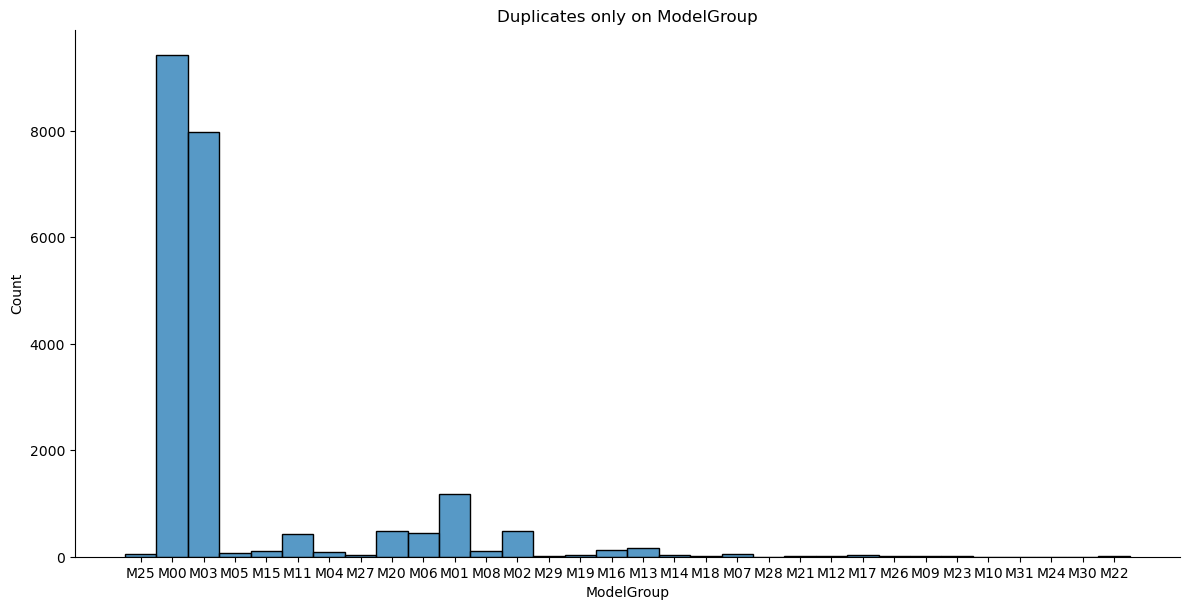

In [ ]:
# lets plot those duplicates by ModelGroup
p = sns.displot(data = df[duplicates & returns], x="ModelGroup", height = 6, aspect = 2)
plt.title("Duplicates only per ModelGroup")
p.savefig("output/duplicates-only-modelgroup.png")

Mostly M00 and M03, compare it with normal data

/Users/ibex/miniconda3/envs/sklearn-env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


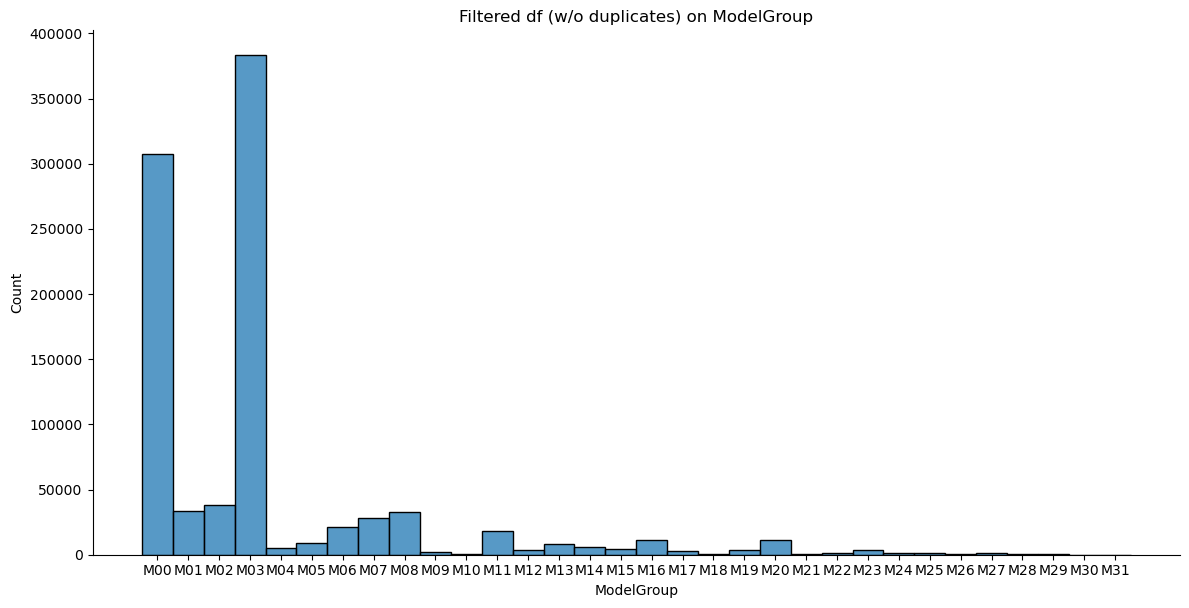

In [ ]:
# Plot data w/o duplicates by model group
p = sns.displot(data = df[~ duplicates], x="ModelGroup", height = 6, aspect = 2)
plt.title("Filtered df (w/o duplicates) on ModelGroup")
p.savefig("output/filtered-modelgroup.png")

Duplicate values similarly distributed when looking at modelgroup.

**How many duplicates actually returned??**

In [ ]:
# ratio of modelgroups on duplicater is large but combined with return and duplicated is small
print("amount of duplicates that are returned", df[duplicates & returns].shape[0]/df[~duplicates].shape[0])

rows m00& duplicates 257107
rows m03 duplicates 319827
total duplicates m00/03 576934
amount of m00/03 in total duplicates 0.7065637112922287
amount of duplicates that are returned 0.02268819552363164


In [ ]:
# check duplicates returns
# not that interseting
import seaborn as sns

g = sns.FacetGrid(data = df[duplicates], hue = "ProductGroup", col = "ModelGroup", col_wrap = 6)
g.map(sns.histplot, "return_rate")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Duplicates")
g.add_legend()
g.savefig("output/duplicates-product-group-modelgroup-returnrates.png", bbox_inches='tight')

#### Conclusion duplicates
Based on above values we will **remove** all duplicates from dataset from here onwards. They only contain <3% of the returned items. Focus is on returned/not-returned items

In [ ]:
filtered_df = df[~duplicates]
filtered_df.to_parquet("transactions-filtered-v02.parquet")

In [12]:
import pandas as pd
df = pd.read_parquet("data/transactions-filtered-v02.parquet")

## Data insights/viz

Return rates

In [13]:
group = df.groupby(["ProductCode"])
returns = group.Returned.value_counts(normalize=True)

returns.head()

ProductCode  Returned
P00000       0           0.996711
             1           0.003289
P00001       0           0.976407
             1           0.023593
P00002       0           1.000000
Name: proportion, dtype: float64

In [8]:
# add return rates to df
df = df.join(returns, on="ProductCode")


ValueError: You are trying to merge on object and int64 columns for key 'ProductCode'. If you wish to proceed you should use pd.concat

Proportion give nan when item was not returned (because it is 1 to 0) then 1 to 0, but 0 becomes nan. So if nan, it must be 0

In [84]:
df.info()
vals = {"proportion_returned": 0}
df = df.fillna(value=vals)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759889 entries, 0 to 1759888
Data columns (total 14 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Shop                       int64  
 1   Order_Date_FK              int64  
 2   ProductCode                object 
 3   OriginalSaleAmountInclVAT  float64
 4   CustomerID                 object 
 5   SaleDocumentNumber         int64  
 6   Returned                   int64  
 7   RevenueInclVAT             float64
 8   CostPriceExclVAT           float64
 9   BrandName                  object 
 10  ModelGroup                 object 
 11  ProductGroup               object 
 12  proportion_not_returned    float64
 13  proportion_returned        float64
dtypes: float64(5), int64(4), object(5)
memory usage: 188.0+ MB


In [85]:
df = df.rename(columns={"proportion_returned": "return_rate"})

### Save filtered and cleaned dataframe

In [88]:
# Save preprocessed df here
df.to_csv("transactions_cleaned_v01.csv")
df.to_parquet("transactions_cleaned_v01.parquet")

### Returns

/Users/ibex/miniconda3/envs/sklearn-env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


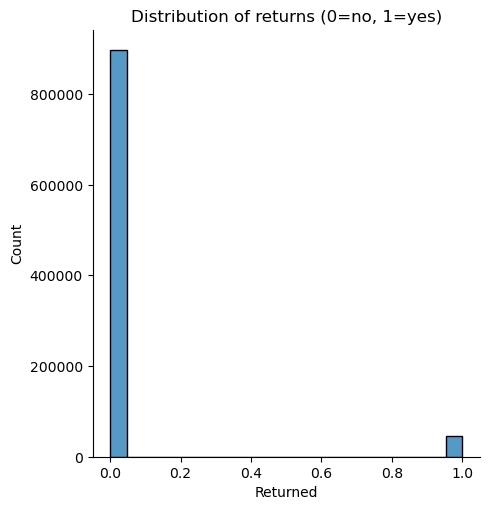

In [ ]:
# Plot the distribution of returns
import seaborn as sns

sns.displot(data = filtered_df, x="Returned").set(title = "Distribution of returns (0=no, 1=yes)")


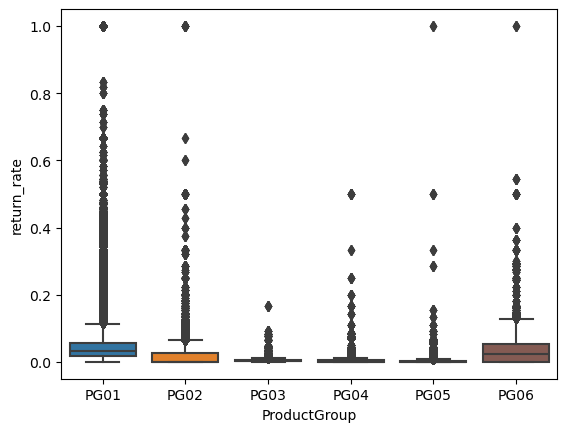

In [ ]:
# Return rate per product groups
p = sns.boxplot(data = filtered_df, x="ProductGroup", y = "return_rate")
p.figure.savefig("output/productgroup-returnrate.png", bbox_inches='tight')

/Users/ibex/miniconda3/envs/sklearn-env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ibex/miniconda3/envs/sklearn-env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


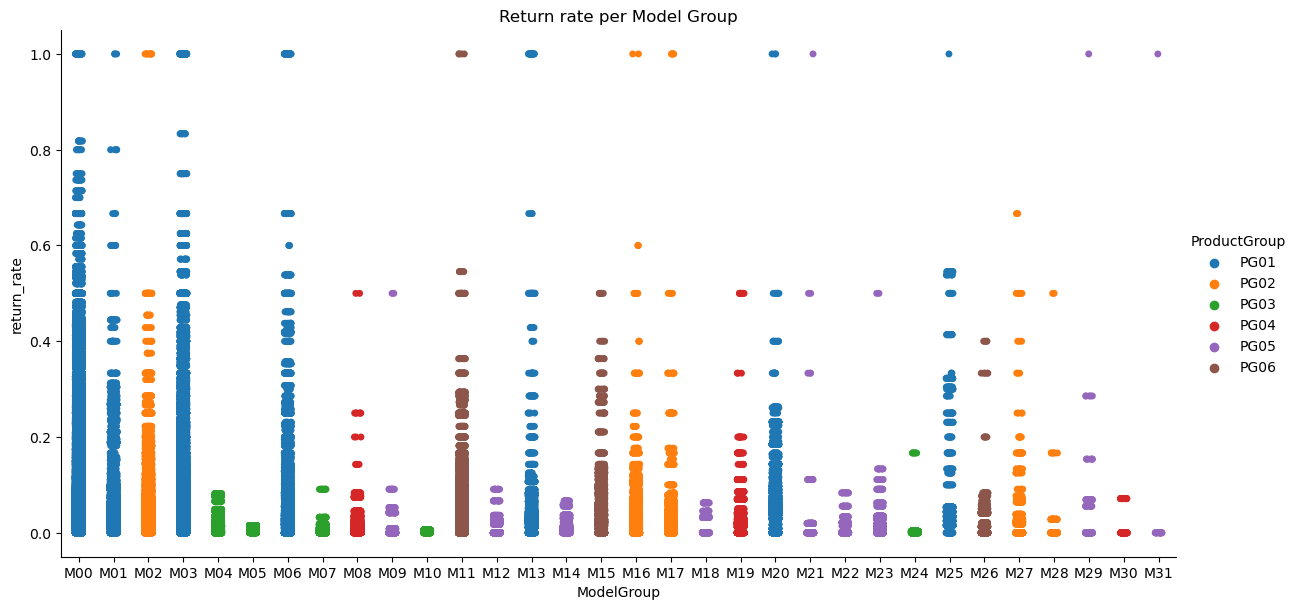

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

p = sns.catplot(data = filtered_df, x="ModelGroup", y = "return_rate",hue = "ProductGroup", height = 6, aspect = 2)
# plt.ylim(0.4, 1)
plt.title("Return rate per Model Group")

p.savefig("output/return-rate-per-modelgroup.png", bbox_inches='tight')


In [21]:
not_returned = filtered_df.return_rate == 0
df[not_returned].head()



,Shop,Order_Date_FK,ProductCode,OriginalSaleAmountInclVAT,CustomerID,SaleDocumentNumber,Returned,RevenueInclVAT,CostPriceExclVAT,BrandName,ModelGroup,ProductGroup,proportion_not_returned,return_rate
2,49,20210730,P00002,69.95,C000002,23995797,0,38.47,24.415000,B002,M02,PG02,1.0,0.0
10,80,20210730,P00009,69.95,C000005,23995800,0,38.47,24.415000,B002,M02,PG02,1.0,0.0
12,8,20210730,P00011,75.95,C000006,23995801,0,53.17,25.711454,B008,M00,PG01,1.0,0.0
30,21,20210730,P00029,39.95,C000020,23995817,0,39.95,16.777636,B019,M03,PG01,1.0,0.0
47,48,20210730,P00045,49.95,C000028,23995829,0,49.95,18.722763,B001,M03,PG01,1.0,0.0


/Users/ibex/miniconda3/envs/sklearn-env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ibex/miniconda3/envs/sklearn-env/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


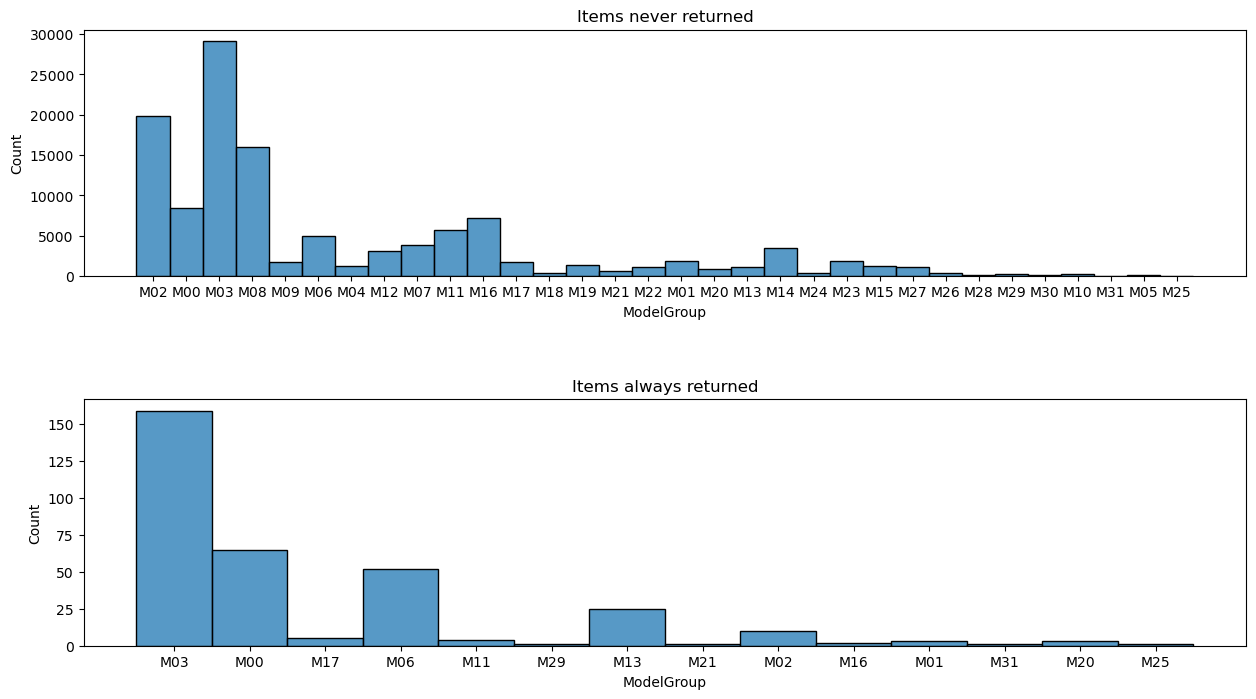

In [27]:
# Plot items that were never returned, on costs and type (modelgroup)
import seaborn as sns
import matplotlib.pyplot as plt

not_returned = filtered_df.return_rate == 0
returned = filtered_df.return_rate == 1

# initialize figure

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,8))
sns.histplot(data = filtered_df[not_returned], x="ModelGroup", ax=ax1)
ax1.set_title("Items never returned")

sns.histplot(data = filtered_df[returned], x="ModelGroup", ax=ax2)
ax2.set_title("Items always returned")

# Adjust space between subplots
plt.subplots_adjust(hspace=0.5)

plt.show()

#### Items always returned

Webshop 102/103 are the only shops that have high number of items that are always returned. The price of these items is spreak kind of normally, with mean around 75 euros

- Items in Product Group 1 are most often returned. 
Within P01, Model Group 0,1,3,6, 13, 20 and 25 have highest return rates.

#### Items never returned
Most physical stores have items that are **never** returned and they are usually under €25. Understandable because maybe it's too much hassle to return the item physically. 

Webshop in contradiction has items a spread of items that are never retured, with mean price around €80-90.

#### In conclusion:

- Physical shops have less returns of cheaper items (<€25)
- Webshops only shop with many items that are always returned
- Webshop items never returned is more spread out than physical shop


# Modelling

Use classification model. Start with Gradient Boost. Returned is binary, use decision tree type of model.


In [30]:
import pandas as pd

filtered_df = pd.read_parquet("data/transactions-filtered-v02.parquet")

In [31]:
from sklearn.model_selection import train_test_split

seed = 2020
X = filtered_df.drop(["proportion_not_returned", "Returned"], axis = 1)
y = filtered_df["Returned"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=seed, test_size=0.2)



In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754683 entries, 346182 to 1471127
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Shop                       754683 non-null  int64  
 1   Order_Date_FK              754683 non-null  int64  
 2   ProductCode                754683 non-null  object 
 3   OriginalSaleAmountInclVAT  754683 non-null  float64
 4   CustomerID                 754683 non-null  object 
 5   SaleDocumentNumber         754683 non-null  int64  
 6   RevenueInclVAT             754683 non-null  float64
 7   CostPriceExclVAT           754683 non-null  float64
 8   BrandName                  754683 non-null  object 
 9   ModelGroup                 754683 non-null  object 
 10  ProductGroup               754683 non-null  object 
 11  return_rate                754683 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 74.9+ MB


In [32]:
# Preprocessing data here
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, TargetEncoder
from sklearn.model_selection import train_test_split

numeric_features = [0,1,3,5,6,7,11]
categorical_features = [2,4,8,9,10]

numeric_transformer = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(TargetEncoder())

Preprocessor = ColumnTransformer(
    transformers=[
        ("numerical_transformer", numeric_transformer, numeric_features),
        ("categorical transformer", categorical_transformer, categorical_features)
    ], #sparse_threshold=0 --> needed for hist but crashes computer
)



## Model 1 : Gradient Boost

In [ ]:
# from sklearn.ensemble import HistGradientBoostingClassifier
# Hist crashes computer, already tried most settings still crashed, i think due to the sparse matrix not possible
from sklearn.ensemble import GradientBoostingClassifier

gb_pipe = make_pipeline(Preprocessor, GradientBoostingClassifier())
gb_pipe.fit(X_train, y_train)

0.05167904592530599

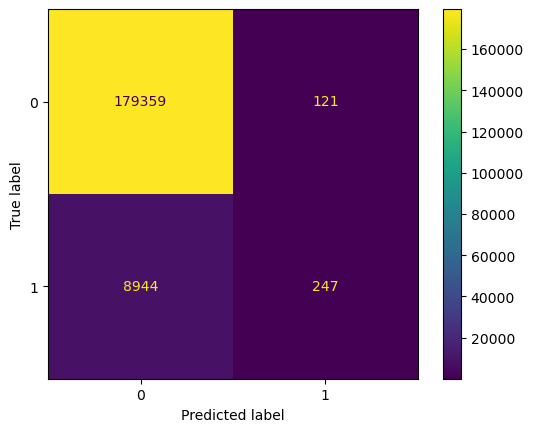

In [15]:
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay

# Score
gb_pipe.score(X_test, y_test)

# Print confusion matrix
y_pred = gb_pipe.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)

disp.plot()

#Print the F1_score
print()
f1_score(y_test, y_pred)

## Conclusion Model 1 - Gradient boost
standard gb model gives a very bad performance, likely due to class imbalance and takes about 5 min to run


Try first xgboost then xgboost with oversampling

## Model 2 XgBoost

In [33]:
from xgboost import XGBClassifier
# from imblearn.over_sampling import RandomOverSampler

bst = XGBClassifier(n_estimators=100, max_depth=2, learning_rate=1, objective='binary:logistic')
bst_pipe = make_pipeline(Preprocessor, bst)
bst_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_transformer',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 5, 6, 7, 11]),
                                                 ('categorical transformer',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  [2, 4, 8, 9, 10])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byle...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

Score 0.9519374996687355
classification report XGBoost
              precision    recall  f1-score   support

           0       0.95      1.00      0.98    179480
           1       0.60      0.04      0.08      9191

    accuracy                           0.95    188671
   macro avg       0.78      0.52      0.53    188671
weighted avg       0.94      0.95      0.93    188671


F1 score 0.07563710499490316


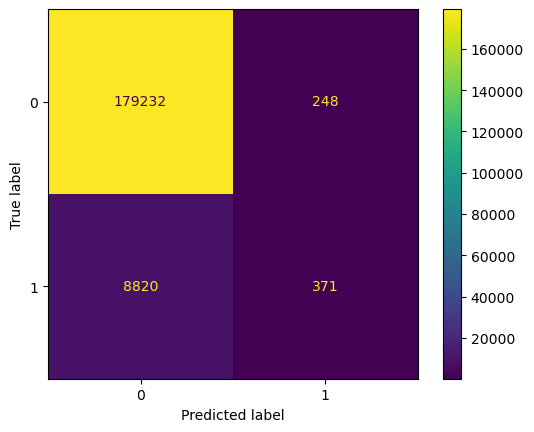

In [5]:
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report

model = bst_pipe
model_name = "XGBoost"

# Score
print("Score", model.score(X_test, y_test))

# Classification report
y_pred = model.predict(X_test)
print("classification report", model_name)
print(classification_report(y_test, y_pred))

#Print the F1_score
print()
print("F1 score", f1_score(y_test, y_pred))

# Confusion matrirx
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()


## XGBoost with resampling

In [34]:
# Resampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = seed)
X_res, y_res = ros.fit_resample(X_train, y_train)


In [35]:
# Xgboost with resampling
bst = XGBClassifier(n_estimators=100, max_depth=2, learning_rate=1, objective='binary:logistic')
bst_pipe_res = make_pipeline(Preprocessor, bst)
bst_pipe_res.fit(X_res, y_res)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_transformer',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 5, 6, 7, 11]),
                                                 ('categorical transformer',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  [2, 4, 8, 9, 10])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byle...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

Score XGBoost with resampling 0.786119753433225
classification report XGBoost with resampling
              precision    recall  f1-score   support

           0       0.98      0.79      0.88    179480
           1       0.15      0.75      0.25      9191

    accuracy                           0.79    188671
   macro avg       0.57      0.77      0.56    188671
weighted avg       0.94      0.79      0.84    188671


F1 score 0.2535654168439356


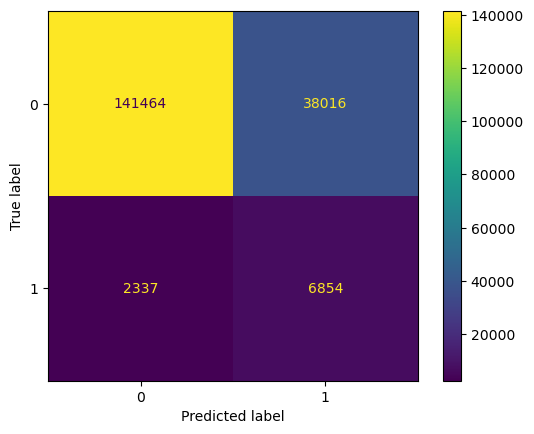

In [14]:
# Classification reports
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report, RocCurveDisplay

model_name = "XGBoost with resampling"

# Score
print("Score",model_name, bst_pipe_res.score(X_test, y_test))

# Classification report
y_pred = model.predict(X_test)
print("classification report", model_name)
print(classification_report(y_test, y_pred))

#Print the F1_score
print()
print("F1 score", f1_score(y_test, y_pred))

# Confusion matrirx
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()


## ROC curve for both models 

Use the ROC plot from above and add the model without oversampling

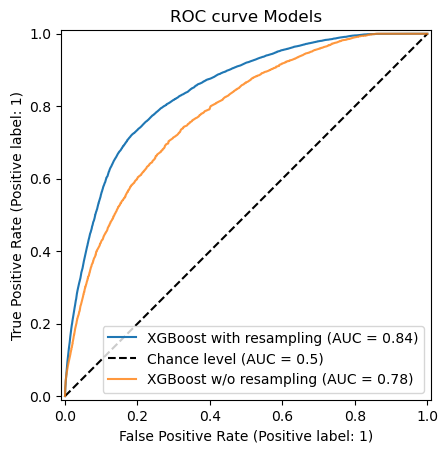

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report, RocCurveDisplay

bst_disp = RocCurveDisplay.from_estimator(bst_pipe_res,
    X_test, 
    y_test, 
    plot_chance_level=True, 
    name = "XGBoost with resampling")

fig = bst_disp.ax_.set(
    # xlabel = "False Positive Rate",
    # ylabel = "True Positive Rate",
    title = "ROC curve Models"
)


# Plot the other 
ax = plt.gca() # gets current axis and allocates it so that the other curve gets plotted together
bst_disp_res = RocCurveDisplay.from_estimator(bst_pipe, X_test, y_test, ax=ax, alpha=0.8, name = "XGBoost w/o resampling") 
# display.plot(ax=ax, alpha=0.8)

## Feature importance

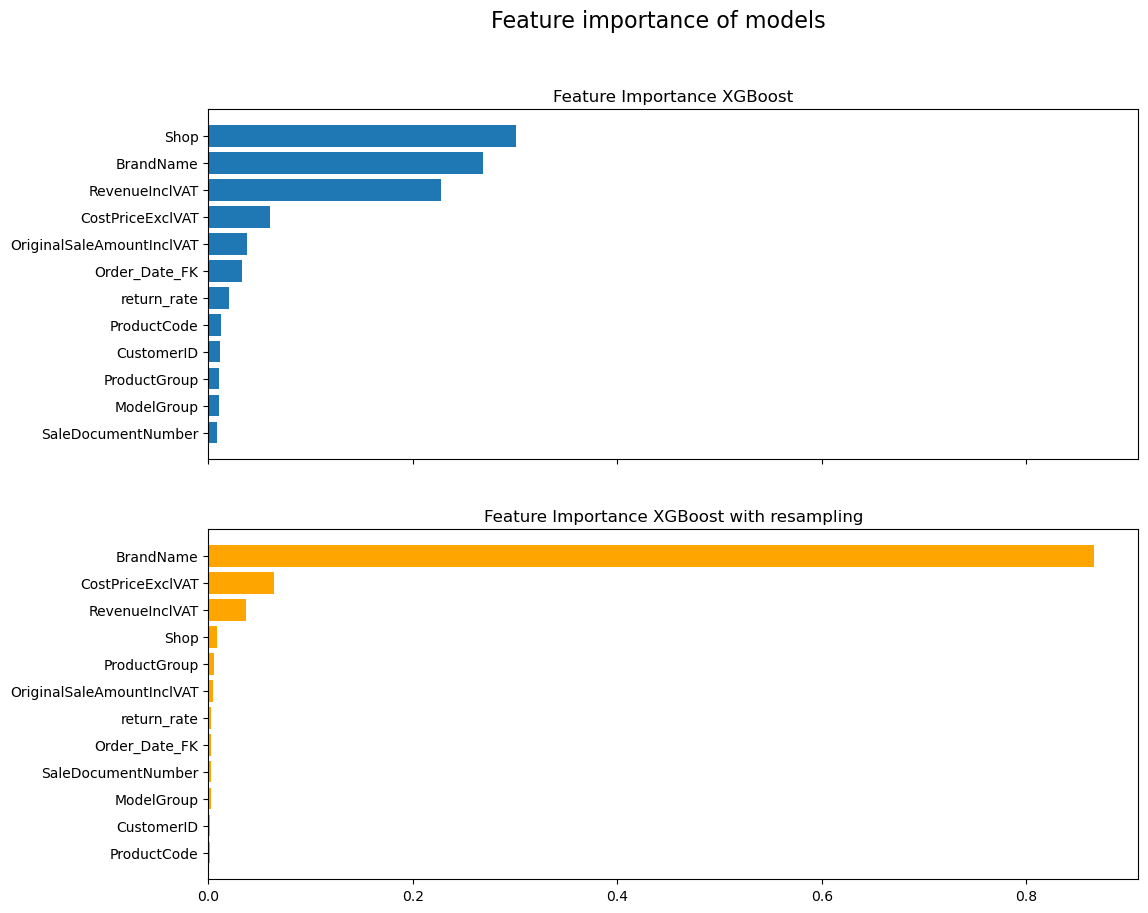

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

feature_importance = bst_pipe.steps[1][1].feature_importances_
sorted_idx = np.argsort(feature_importance)

# Initialize figure here
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10), sharex=True)
fig.suptitle("Feature importance of models", fontsize=16)

# Plot for first model
ax1.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
ax1.set_yticks(range(len(sorted_idx)), X_test.columns[sorted_idx])
ax1.set_yticklabels(X_test.columns[sorted_idx])
ax1.set_title("Feature Importance XGBoost")

# add plot with XGBoost w/ resampling
feature_importance_res = bst_pipe_res.steps[1][1].feature_importances_
sorted_idx_res = np.argsort(feature_importance_res)
ax2.barh(range(len(sorted_idx_res)), feature_importance_res[sorted_idx_res], align="center", color = 'orange')
ax2.set_yticks(range(len(sorted_idx_res)), X_test.columns[sorted_idx_res])
ax2.set_yticklabels(X_test.columns[sorted_idx_res])
ax2.set_title("Feature Importance XGBoost with resampling")

fig.savefig("output/feature-importance-models.png", bbox_inches='tight')


In [11]:
feature_importance_res = bst_pipe_res[1][1].feature_importances_
sorted_idx = np.argsort(feature_importance_res)


In [ ]:
# Permutation importance - optional
result = permutation_importance(
    bst_pipe, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    # labels=np.array(X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [35]:
from collections import Counter
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 717482, 1: 37201})
Resampled dataset shape Counter({0: 717482, 1: 717482})


## Random Forest
Not worth it, takes too much time

In [4]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = seed)
X_res, y_res = ros.fit_resample(X_train, y_train)
rf = RandomForestClassifier(n_estimators=10, n_jobs=4)
rf_pipe = make_pipeline(Preprocessor, rf)
rf_pipe.fit(X_res, y_res)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical_transformer',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 5, 6, 7, 11]),
                                                 ('categorical transformer',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [2, 4, 8, 9, 10])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=10, n_jobs=4))])

In [5]:
import joblib

joblib.dump(rf_pipe, "./random_forest.joblib")

['./random_forest.joblib']

Score 0.9412787338806706
classification report RF
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    179480
           1       0.24      0.10      0.14      9191

    accuracy                           0.94    188671
   macro avg       0.60      0.54      0.55    188671
weighted avg       0.92      0.94      0.93    188671


F1 score Random Forest 0.1377539108101798


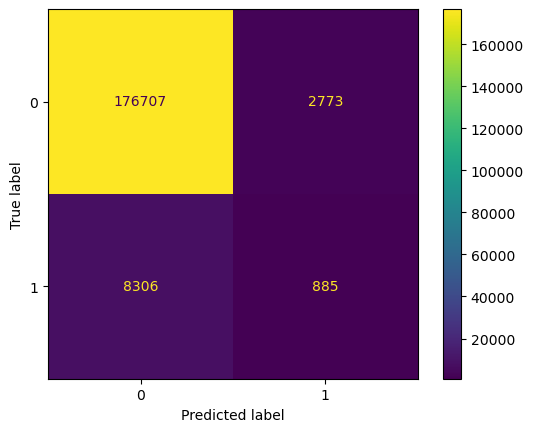

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
# Score
print("Score", rf_pipe.score(X_test, y_test))

# Print confusion matrix
y_pred_rf = rf_pipe.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(cm)

#Print the F1_score
print("classification report RF")
print(classification_report(y_test, y_pred_rf))
print()
print("F1 score Random Forest", f1_score(y_test, y_pred_rf))

disp.plot()

In [ ]:
#TODO: Consider hyper parameter tuning with randomsearch cv
from sklearn.model_selection import RandomizedSearchCV as RSCV

param_grid = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

model = RSCV(RandomForestClassifier(), param_grid, n_iter = 15).fit(X_train, y_train)
model = model.best_estimator_

In [8]:
#parameters to tune -- crashing PC
from sklearn.model_selection import GridSearchCV

parameters = {
 'histgradientboostingclassifier__max_iter': [1000,1200],
 'histgradientboostingclassifier__learning_rate': [0.1],
 'histgradientboostingclassifier__max_depth' : [25, 50],
 'histgradientboostingclassifier__l2_regularization': [1.5],
 'histgradientboostingclassifier__scoring': ['f1_micro'],
 'histgradientboostingclassifier__random_state' : [seed],
 }
#instantiate the gridsearch
hgb_grid = GridSearchCV(hgb_pipe, parameters, n_jobs=1,
 cv=3, scoring='f1_micro',
 verbose=2, refit=True)
#fit on the grid 
hgb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


: 